In [52]:
import pandas as pd

In [53]:
#reading all csv files
movie_df=pd.read_csv('movies.csv')
rate_df=pd.read_csv('ratings.csv')
tags_df=pd.read_csv('tags.csv')
link_df=pd.read_csv('links.csv')

In [54]:
#Finding shape of movies dataset 
movie_df.shape

(9742, 3)

In [55]:
#Finding shape of ratings dataset 
rate_df.shape

(100836, 4)

In [56]:
rate_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [57]:
#Finding number of unique users
unique_users=rate_df['userId'].unique()

In [58]:
print("Number of unique userIds in ratings.csv:", len(unique_users))

Number of unique userIds in ratings.csv: 610


movie_df.head()

In [59]:
movie_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [60]:
# Merging ratings with movies based on movieId
merged_data = pd.merge(rate_df, movie_df, on='movieId')

In [61]:
# Grouping the merged data by movie title and counting the number of ratings for each movie
movie_ratings_cnt = merged_data.groupby('title').size()

# Finding the movie with the maximum number of ratings
movie_max_ratings = movie_ratings_cnt.idxmax()

In [62]:
print("Movie with the maximum number of user ratings:", movie_max_ratings)

Movie with the maximum number of user ratings: Forrest Gump (1994)


In [63]:
tags_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [64]:
link_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [65]:
matrix_movieId=movie_df[movie_df['title'] == 'Matrix, The (1999)']['movieId'].values[0]

In [66]:
# Filtering tags for the movieId of "Matrix, The (1999)"
matrix_tags = tags_df[tags_df['movieId'] == matrix_movieId]

# Displaying the unique tags for the movie
unique_matrix_tags = matrix_tags['tag'].unique()
print("Tags submitted by users for 'Matrix, The (1999)':")
print(unique_matrix_tags)

Tags submitted by users for 'Matrix, The (1999)':
['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [67]:
terminator_movieId=movie_df[movie_df['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]

In [68]:
# Filtering ratings for the movieId of "Terminator 2: Judgment Day (1991)"
terminator_ratings = rate_df[rate_df['movieId'] == terminator_movieId]

# Calculating the average user rating for the movie
avg_rating = terminator_ratings['rating'].mean()

print("Average user rating for 'Terminator 2: Judgment Day (1991)':", avg_rating)

Average user rating for 'Terminator 2: Judgment Day (1991)': 3.970982142857143


In [69]:
fightclub_movieId=movie_df[movie_df['title'] == 'Fight Club (1999)']['movieId'].values[0]

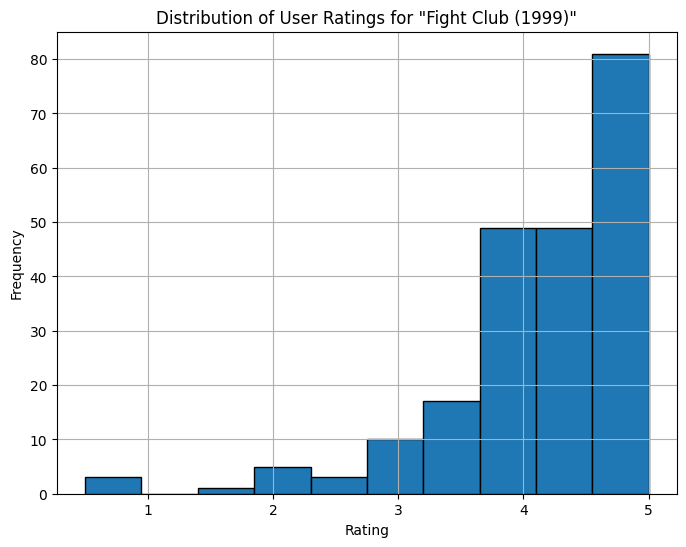

In [70]:
# Filtering ratings for the movieId of "Fight Club (1999)"
fight_club_ratings = rate_df[rate_df['movieId'] == fightclub_movieId]

import matplotlib.pyplot as plt
# Plotting the distribution of user ratings for "Fight Club (1999)"
plt.figure(figsize=(8, 6))
plt.hist(fight_club_ratings['rating'], bins=10, edgecolor='black')
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [71]:
# Grouping user ratings based on movieId and applying count and mean operations
grouped_ratings = rate_df.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
grouped_ratings.columns = ['movieId', 'rating_count', 'rating_mean']

In [72]:
#Applying an inner join on movies and grouped ratings
merge_df = pd.merge(movie_df, grouped_ratings, on='movieId', how='inner')

In [73]:
# Filtering movies with more than 50 user ratings
filtered_movies = merge_df[merge_df['rating_count'] > 50]

In [74]:
filtered_movies.head()

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185


In [75]:
#finding most popular based on  average user ratings
most_popular=filtered_movies[filtered_movies['rating_mean'] == filtered_movies['rating_mean'].max()]

print("Most popular movie based on average user ratings:" ,most_popular['title'] )

Most popular movie based on average user ratings: 277    Shawshank Redemption, The (1994)
Name: title, dtype: object


In [76]:
# top 5 popular movies based on number of user ratings.
top5_popular_movies = filtered_movies.nlargest(5, 'rating_count')

print("Top 5 popular movies based on number of user ratings:")
print(top5_popular_movies[['title', 'rating_count']])

Top 5 popular movies based on number of user ratings:
                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


In [77]:
scifi_movie=filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi')]

In [78]:
#sorting the Sci-Fi movies by the number of user ratings in descending order
sorted_scifi = scifi_movie.nlargest(len(scifi_movie), 'rating_count')

# third most popular Sci-Fi movie based on the number of user ratings
thirdmost_popular = sorted_scifi.iloc[2]  # Index 2 corresponds to the third movie


print("Third most popular Sci-Fi movie based on number of user ratings:")
print(thirdmost_popular[['title', 'rating_count']])

Third most popular Sci-Fi movie based on number of user ratings:
title           Jurassic Park (1993)
rating_count                     238
Name: 418, dtype: object


In [79]:
# We thought of giving you a gift this new year by sharing the web scraping script
# Understanding the script before using is always appreciated
# We left few blanks in the script for your exploration
# Make sure to replace FILL_IN_THE_BLANK in the code to make it work

import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text,'html.parser')
    imdb_rating = soup.find('div', class_='ratingValue')
    if imdb_rating:
        imdb_rating=imdb_rating.find('strong').find('span').text.strip()
        return imdb_rating
    return np.nan

In [80]:
#merge links data with filtered data 
merge_df2=pd.merge(filtered_movies,link_df,on='movieId',how='inner')

In [81]:
#Scrapping imdb rating for each movie
imdb_ratings=[]
for imdbId in merge_df2['imdbId']:
    rating=scrapper(imdbId)
    imdb_ratings.append(rating)
    
#Adding scrapped imdb ratings to dataframe
merge_df2['imdb_rating']=imdb_ratings
print(merge_df2[['title', 'imdb_rating']])

                                title  imdb_rating
0                    Toy Story (1995)          NaN
1                      Jumanji (1995)          NaN
2             Grumpier Old Men (1995)          NaN
3                         Heat (1995)          NaN
4                      Sabrina (1995)          NaN
..                                ...          ...
431   Wolf of Wall Street, The (2013)          NaN
432  Grand Budapest Hotel, The (2014)          NaN
433               Interstellar (2014)          NaN
434    Guardians of the Galaxy (2014)          NaN
435                   Deadpool (2016)          NaN

[436 rows x 2 columns]


In [87]:
# Convert 'imdb_rating' column to numeric values for further analysis
merge_df2['imdb_rating'] = pd.to_numeric(merge_df2['imdb_rating'], errors='coerce')

# Drop rows with NaN IMDb ratings
merge_df2.dropna(subset=['imdb_rating'], inplace=True)

if not merge_df2.empty:
    # Find the movie with the highest IMDB rating
    highest_imdb_movie = merge_df2.loc[merge_df2['imdb_rating'].idxmax()]

    print("Movie with the highest IMDB rating - Movie ID:", highest_imdb_movie['movieId'])
else:
    print("No valid data found in the 'imdb_rating' column after handling NaN values.")


No valid data found in the 'imdb_rating' column after handling NaN values.


In [88]:
unique_ratings = merge_df2['imdb_rating'].unique()
print("Unique IMDb Ratings:", unique_ratings)

Unique IMDb Ratings: []


In [82]:
# Converting column to numeric values for further analysis
merge_df2['imdb_rating'] = pd.to_numeric(merge_df2['imdb_rating'], errors='coerce')

In [83]:
# Remove rows with NaN IMDb ratings
merge_df2 = merge_df2.dropna(subset=['imdb_rating'])

In [84]:
#movie with the highest IMDB rating
if not merge_df2.empty:
    highest_imdb= merge_df2.loc[merge_df2['imdb_rating'].idxmax()]

    print("Movie with the highest IMDB rating - Movie ID:", highest_imdb['movieId'])
else:
    print("Not found")

Not found


In [51]:
#Sci-Fi movie with the highest IMDB rating
scifi_movies = merge_df2[merge_df2['genres'].str.contains('Sci-Fi')]
if not scifi_movies.empty:
    highest_imdb_scifi= scifi_movies.loc[scifi_movies['imdb_rating'].idxmax(skipna=True)]
    print("Highest-rated Sci-Fi movie - Movie ID:", highest_imdb_scifi['movieId'])
else:
    print('No Sci-Fi movies found in the dataset after handling NaN IMDb ratings')

No Sci-Fi movies found in the dataset after handling NaN IMDb ratings
